In [24]:
import matplotlib.pyplot as plt


# Preparing data for testing models


In [25]:
import numpy as np

np.random.seed(1337)

# Class 0
mean0 = [2, 2]
cov0 = [[1, 0.5], [0.5, 1]]
data0 = np.random.multivariate_normal(mean0, cov0, 100)

# Class 1
mean1 = [5, 5]
cov1 = [[1, -0.5], [-0.5, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, 100)

# Concate
x = np.vstack((data0, data1))
y = np.array([0]*100 + [1]*100)

print(x[:5])
print(y[:5])


[[ 2.85411926  2.36383689]
 [ 3.15623874  1.40116003]
 [ 2.82665561  0.81539103]
 [ 2.31398477  2.65120177]
 [ 1.34403698 -0.02669958]]
[0 0 0 0 0]


# 1. Implementation (from scratch) of LDA, QDA and NB (Naive Bayes) methods for binary classication (classes 0 and 1)


### LDA

In [26]:
from BinaryClassifiers import LDA


In [27]:
lda = LDA()


In [28]:
lda.fit(x, y)

xx, yy, z = lda.find_border()


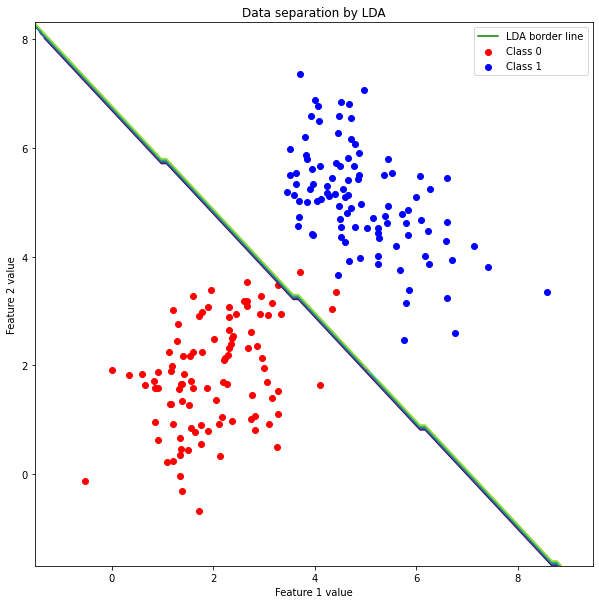

In [29]:
plt.figure(figsize=((10, 10)))

contour = plt.contour(xx, yy, z)
plt.clabel(contour, fontsize=0)
plt.plot([], [], "g", label="LDA border line")

plt.scatter(
    x[y == 0][:, 0],
    x[y == 0][:, 1],
    color="red",
    label="Class 0"
    )

plt.scatter(
    x[y == 1][:, 0],
    x[y == 1][:, 1],
    color="blue",
    label="Class 1"
    )

plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Data separation by LDA")
plt.savefig("plots/LDA_data_separation.png")
plt.show()


### QDA

In [30]:
from BinaryClassifiers import QDA


In [31]:
qda = QDA()


In [32]:
qda.fit(x, y)

xx, yy, z = qda.find_border()


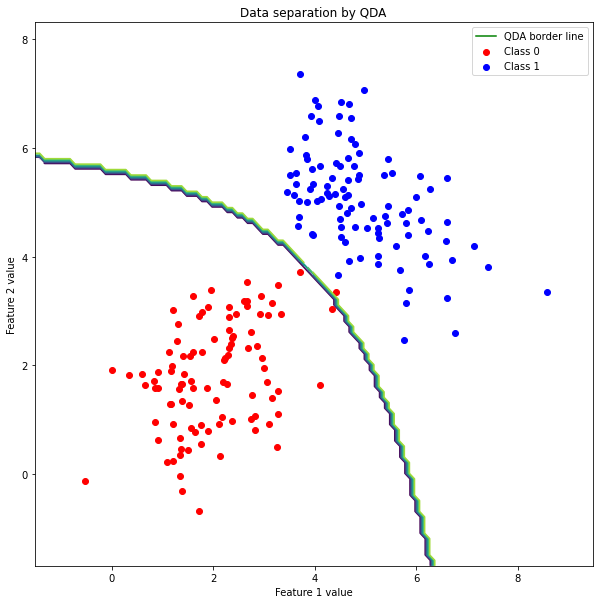

In [33]:
plt.figure(figsize=((10, 10)))

contour = plt.contour(xx, yy, z)
plt.clabel(contour, fontsize=0)
plt.plot([], [], "g", label="QDA border line")

plt.scatter(
    x[y == 0][:, 0],
    x[y == 0][:, 1],
    color="red",
    label="Class 0"
    )

plt.scatter(
    x[y == 1][:, 0],
    x[y == 1][:, 1],
    color="blue",
    label="Class 1"
    )

plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Data separation by QDA")
plt.savefig("plots/QDA_data_separation.png")
plt.show()


### Naive Bayes

In [34]:
from BinaryClassifiers import NaiveBayes


In [35]:
naive_bayes = NaiveBayes()


In [36]:
naive_bayes.fit(x, y)

xx, yy, z = naive_bayes.find_border()


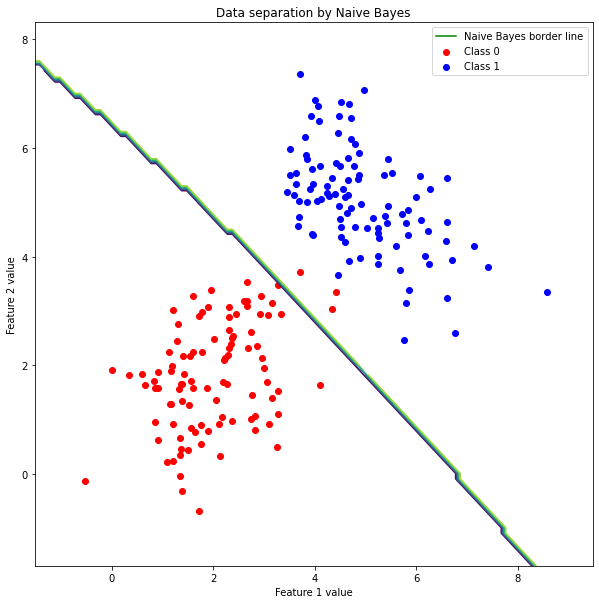

In [37]:
plt.figure(figsize=((10, 10)))

contour = plt.contour(xx, yy, z)
plt.clabel(contour, fontsize=0)
plt.plot([], [], "g", label="Naive Bayes border line")

plt.scatter(
    x[y == 0][:, 0],
    x[y == 0][:, 1],
    color="red",
    label="Class 0"
    )

plt.scatter(
    x[y == 1][:, 0],
    x[y == 1][:, 1],
    color="blue",
    label="Class 1"
    )

plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Data separation by Naive Bayes")
plt.savefig("plots/NaiveBayes_data_separation.png")
plt.show()


# 2. Comparison of LDA, QDA and NB methods on simulated data.


In [38]:
from tools import train_test_split, generate_y

TRAIN_SIZE = 0.8


n = 1000
prob = 0.5
p = 2

mean = 0
variance = 1

alpha = 3
rho = 0.5

y = generate_y(prob, n)


### Data 1

In [39]:
from tools import generate_data_1

data_1 = generate_data_1(y, mean, alpha, variance, True)
print(data_1)


[[1.         1.44722587 5.3679265 ]
 [1.         2.08310186 4.01713776]
 [1.         4.68658242 3.93841923]
 ...
 [1.         3.46283102 2.49810844]
 [1.         2.68965    3.88370818]
 [1.         3.74593938 2.50925448]]


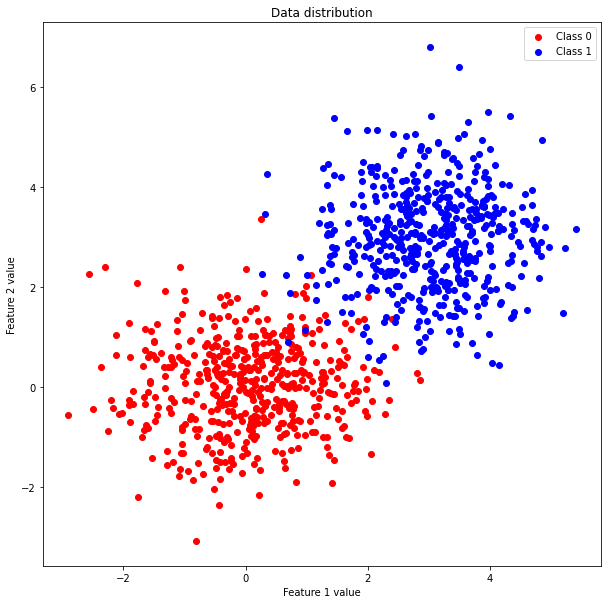

In [40]:
plt.figure(figsize=((10, 10)))

y0 = data_1[:, 0] == 0
plt.scatter(
    data_1[y0][:, 1],
    data_1[y0][:, 2],
    color="red",
    label="Class 0"
    )

y1 = data_1[:, 0] == 1
plt.scatter(
    data_1[y1][:, 1],
    data_1[y1][:, 2],
    color="blue",
    label="Class 1"
    )

plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Data distribution")
plt.savefig("plots/data_1_distribution.png")
plt.show()


In [41]:
train_1, test_1 = train_test_split(data_1, TRAIN_SIZE)


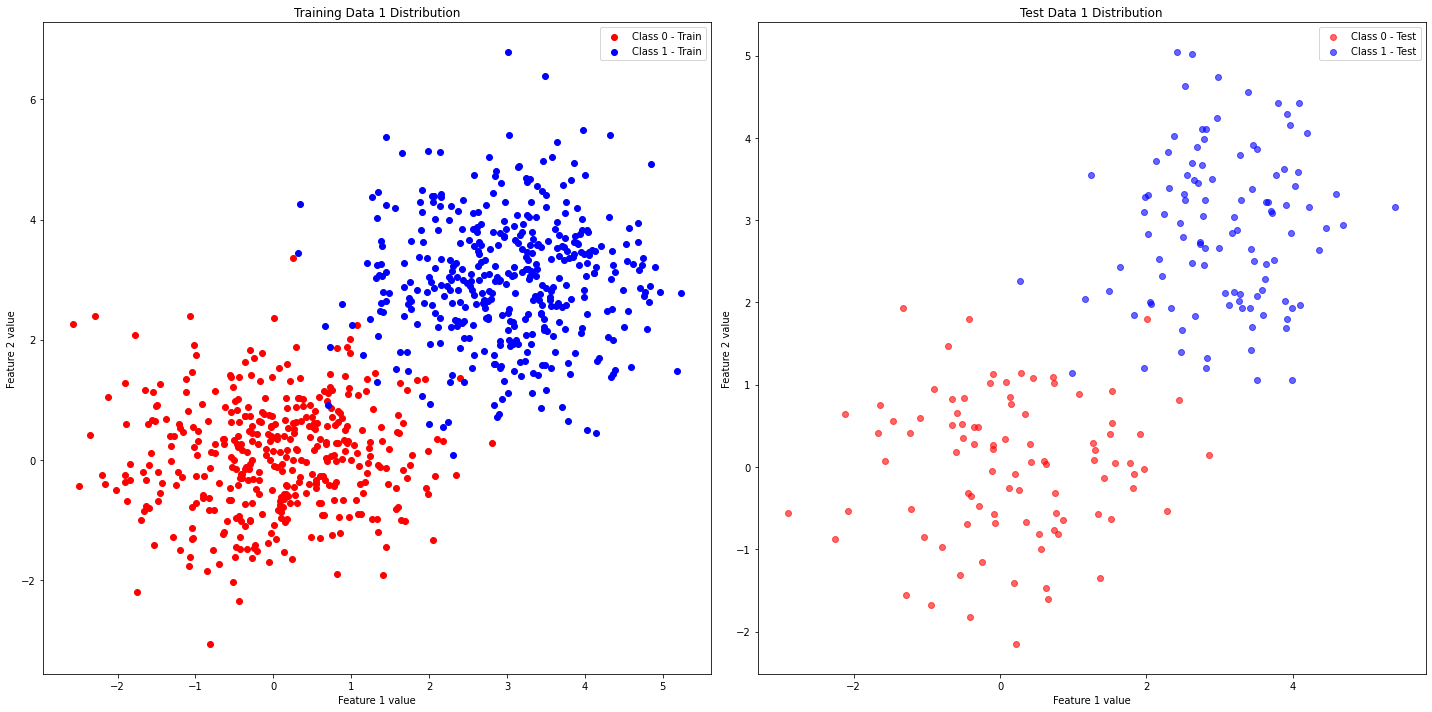

In [42]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
y0_train = train_1[:, 0] == 0
plt.scatter(train_1[y0_train][:, 1], train_1[y0_train][:, 2], color="red", label="Class 0 - Train")
y1_train = train_1[:, 0] == 1
plt.scatter(train_1[y1_train][:, 1], train_1[y1_train][:, 2], color="blue", label="Class 1 - Train")
plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Training Data 1 Distribution")

plt.subplot(1, 2, 2)
y0_test = test_1[:, 0] == 0
plt.scatter(test_1[y0_test][:, 1], test_1[y0_test][:, 2], color="red", label="Class 0 - Test", alpha=0.6)
y1_test = test_1[:, 0] == 1
plt.scatter(test_1[y1_test][:, 1], test_1[y1_test][:, 2], color="blue", label="Class 1 - Test", alpha=0.6)
plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Test Data 1 Distribution")

plt.tight_layout()
plt.savefig("plots/data_1_distribution_comparison.png")
plt.show()


### Data 2

In [43]:
from tools import generate_data_2

data_2 = generate_data_2(y, rho, alpha, True)
print(data_2)


[[ 0.          0.94909546 -0.10039886]
 [ 1.          3.57937718  3.39114413]
 [ 1.          3.04782709  2.64264001]
 ...
 [ 0.          0.45930092 -0.28120164]
 [ 0.          1.48488108  0.30588403]
 [ 1.          3.10950996  2.76037948]]


In [44]:
train_2, test_2 = train_test_split(data_2, TRAIN_SIZE)


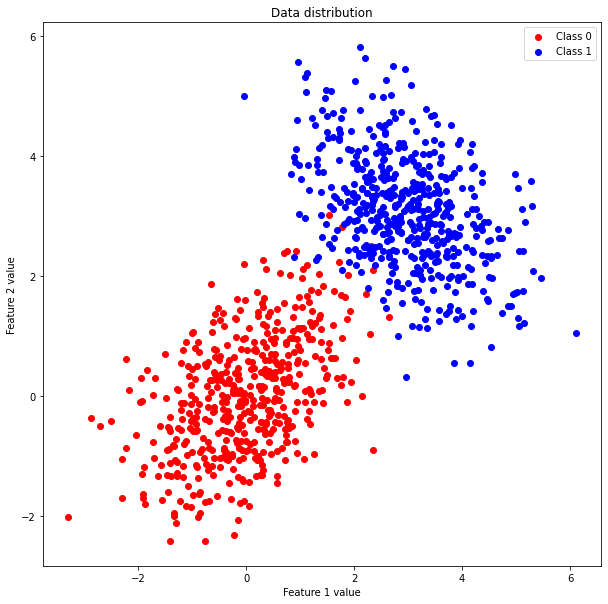

In [45]:
plt.figure(figsize=((10, 10)))

y0 = data_2[:, 0] == 0
plt.scatter(
    data_2[y0][:, 1],
    data_2[y0][:, 2],
    color="red",
    label="Class 0"
    )

y1 = data_2[:, 0] == 1
plt.scatter(
    data_2[y1][:, 1],
    data_2[y1][:, 2],
    color="blue",
    label="Class 1"
    )

plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Data distribution")
plt.savefig("plots/data_2_distribution.png")
plt.show()


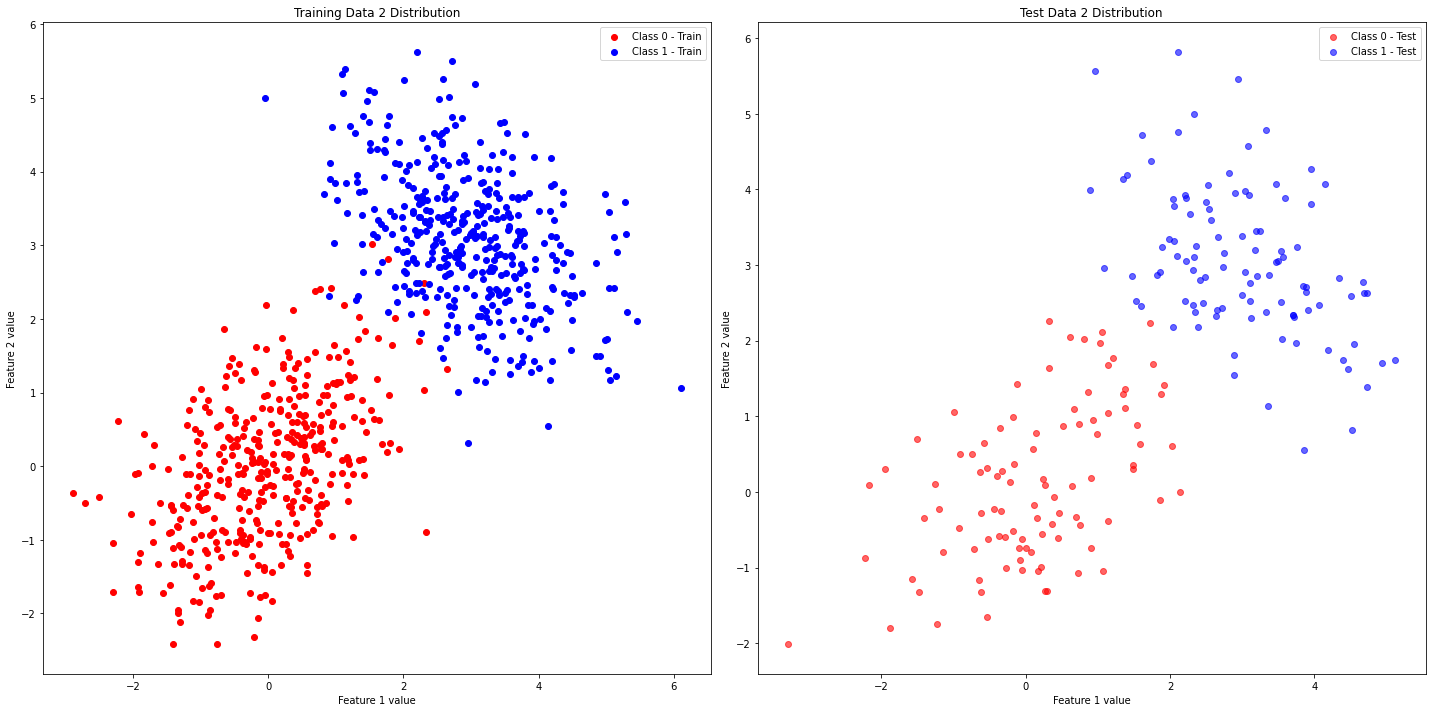

In [46]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
y0_train = train_2[:, 0] == 0
plt.scatter(train_2[y0_train][:, 1], train_2[y0_train][:, 2], color="red", label="Class 0 - Train")
y1_train = train_2[:, 0] == 1
plt.scatter(train_2[y1_train][:, 1], train_2[y1_train][:, 2], color="blue", label="Class 1 - Train")
plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Training Data 2 Distribution")

plt.subplot(1, 2, 2)
y0_test = test_2[:, 0] == 0
plt.scatter(test_2[y0_test][:, 1], test_2[y0_test][:, 2], color="red", label="Class 0 - Test", alpha=0.6)
y1_test = test_2[:, 0] == 1
plt.scatter(test_2[y1_test][:, 1], test_2[y1_test][:, 2], color="blue", label="Class 1 - Test", alpha=0.6)
plt.legend()
plt.xlabel("Feature 1 value")
plt.ylabel("Feature 2 value")
plt.title("Test Data 2 Distribution")

plt.tight_layout()
plt.savefig("plots/data_2_distribution_comparison.png")
plt.show()
